In [101]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [102]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [104]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [105]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [106]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [107]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [108]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [109]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

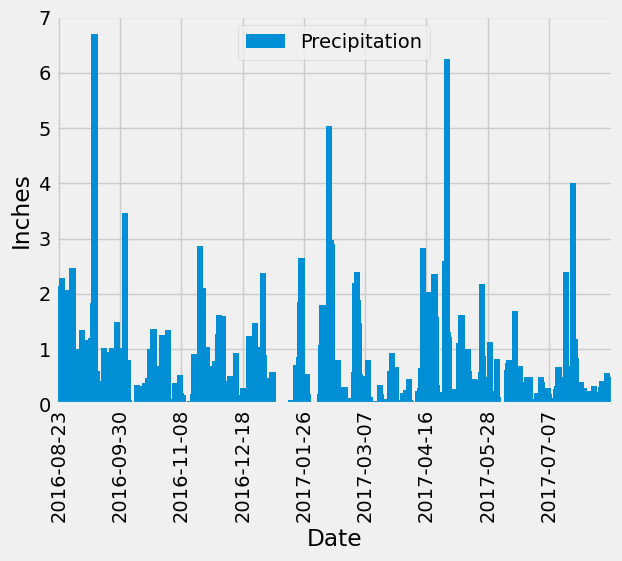

In [110]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
most_recent = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_back = most_recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= most_recent).\
    filter(Measurement.date >= year_back).\
    order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data = pd.DataFrame(precip_data_query, columns=['Date','Precipitation'])

# Sort the dataframe by date
precip_data = precip_data.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_data.plot.bar(x='Date', y='Precipitation', ylabel='Inches', width=25)
plt.locator_params(axis='x', nbins=9)

In [111]:
# Use Pandas to calculate the summary statistics for the precipitation data
sum_stats = pd.DataFrame(precip_data['Precipitation'].describe())
sum_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [116]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [154]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [161]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

most_active_stats

[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature', ylabel='Frequency'>

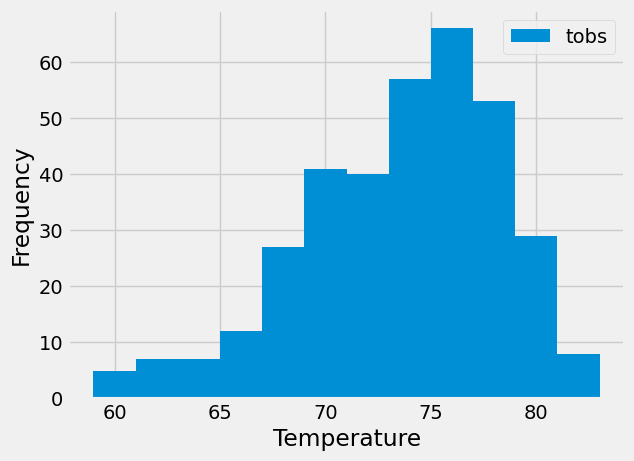

In [194]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data_query = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= most_recent).\
    filter(Measurement.date >= year_back).\
    order_by(Measurement.tobs).all()

temp_data = pd.DataFrame(temp_data_query, columns=['tobs'])

temp_data.plot.hist(xlabel='Temperature', bins=12)

# Close Session

In [195]:
# Close Session
session.close()